In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [3]:
df_us = df[df.job_country == 'United States'].copy()

In [9]:
df_us['job_posted_month'] = df.job_posted_date.dt.strftime('%B')


In [26]:
top_3_jobs = df_us.groupby('job_title_short')['job_title_short'].count().sort_values(ascending=False).head(3).index.to_list()

In [27]:
type(top_3_jobs)

list

In [49]:
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns= 'job_title_short', aggfunc='size')

In [28]:
df_us_pivot = df_us_pivot[top_3_jobs]

In [67]:
df_us_pivot.reset_index(inplace = True)

In [33]:
df_us_pivot

job_title_short,job_posted_month,Data Analyst,Data Scientist,Data Engineer
0,April,6049,4867,2801
1,August,6634,6318,3269
2,December,3979,3472,2641
3,February,6124,4956,3060
4,January,8494,6915,2655
5,July,5201,4876,2570
6,June,5683,4645,2893
7,March,6218,4779,3183
8,May,4993,4377,2976
9,November,4531,4175,2793


In [68]:
df_us_pivot['month_num'] = pd.to_datetime(df_us_pivot['job_posted_month'], format ='%B').dt.month

In [69]:
df_us_pivot= df_us_pivot.sort_values('month_num')

In [89]:
df_us_pivot.set_index('job_posted_month', inplace=True)

In [ ]:
df_us_pivot.drop('month_num', axis =1, inplace= True)

<Axes: xlabel='job_posted_month'>

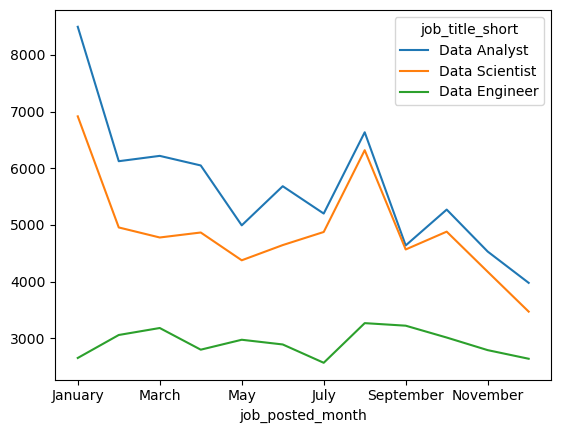

In [47]:
df_us_pivot.plot(kind= 'line')

In [91]:
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [53]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')


In [92]:
df_us_merge = df_us_pivot.merge(df_US_software_pivot, on = 'job_posted_month')

In [93]:
df_us_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Business Analyst           12 non-null     int64
 1   Cloud Engineer             12 non-null     int64
 2   Data Analyst               12 non-null     int64
 3   Data Engineer              12 non-null     int64
 4   Data Scientist             12 non-null     int64
 5   Machine Learning Engineer  12 non-null     int64
 6   Senior Data Analyst        12 non-null     int64
 7   Senior Data Engineer       12 non-null     int64
 8   Senior Data Scientist      12 non-null     int64
 9   Software Engineer          12 non-null     int64
 10  Front-End Developer        12 non-null     int64
 11  Back-End Developer         12 non-null     int64
 12  Full-Stack Developer       12 non-null     int64
 13  UI/UX Designer             12 non-null     int64
dtypes: int64(14)
memory u

In [95]:
# You can wrap the function used in (  ), so that you can break it down in different lines for clearer view
top_5 = (df_us_merge
         .sum()
         .sort_values(ascending=False)
         .head().index
         .to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

In [96]:
df_us_merge = df_us_merge[top_5]

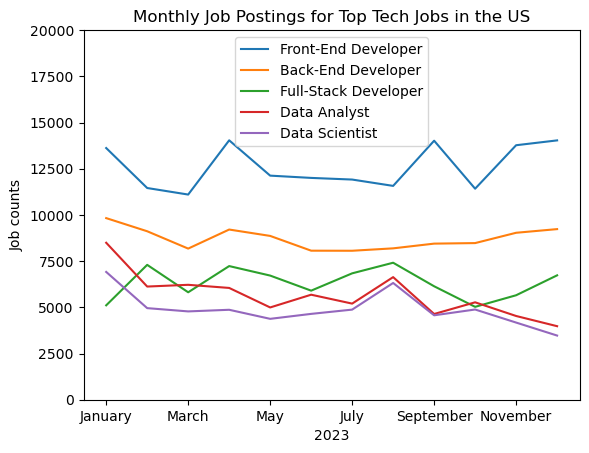

In [98]:
df_us_merge.plot(kind= 'line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.ylabel('Job counts')
plt.xlabel(2023)
plt.legend()
plt.ylim(0, 20_000)
plt.show()